In [1]:
import utils
from dawid import otl_normalized
import minterpy as mp
import numpy as np
import matplotlib.pyplot as plt
import utilsLegandre

[[-0.16686413 -0.9604968   0.33676003  0.29929616 -0.393106    0.91079823]
 [-0.59563697 -0.71799978  0.07362253  0.43742003 -0.69233537 -0.40444995]
 [-0.29614767 -0.79055035  0.33789729 -0.37170975 -0.42263963 -0.39353992]
 ...
 [ 0.62480653 -0.01869739  0.59358766  0.79167544 -0.83705322  0.82866667]
 [-0.69748529  0.47443546  0.85517613  0.61909351  0.19060077 -0.30499804]
 [-0.83845093 -0.62952226  0.65754729 -0.74520773  0.06993336 -0.66357575]]


In [2]:
sample = utils.draw_sample(100)

function_eval= otl_normalized(sample)
# size
print(function_eval)


[3.87609321 5.67437512 7.89620858 3.58473023 5.19888858 3.81693606
 6.71979264 6.0674356  5.20899236 7.16631245 4.44488972 5.54508342
 5.9919779  6.65511059 5.78808946 6.88575512 6.72784063 4.37524258
 5.47622584 4.42940948 3.92619589 7.22978323 8.40183575 3.63773546
 6.45353986 6.31946166 3.51644956 5.95324457 5.61157818 3.84316904
 4.86352271 8.26880589 4.78497534 6.30270222 4.28421054 6.29662036
 4.64535309 5.63833015 4.84669091 5.23889928 4.02524989 3.53139907
 5.22835991 7.83556609 6.6635297  6.42698516 5.20747935 4.28629747
 4.71357312 5.08923511 7.66321431 3.87760591 5.81788496 4.46782408
 4.91436142 3.56055768 6.03110021 7.61017669 4.95929564 7.36778848
 5.10693947 5.74581868 6.9710828  5.61748131 4.60762202 6.61409976
 3.92149522 4.2272931  6.80418458 5.44293038 5.74548531 6.87984738
 6.94377601 6.62120462 5.75892809 4.37288223 3.92179661 3.84099826
 6.8634795  6.46804368 5.04142517 7.18223327 5.00605486 6.77595118
 5.24429403 4.59138788 5.57299152 4.73393238 6.99166788 5.8158

In [3]:
expected_value = np.mean(function_eval)
variance_value = np.var(function_eval)

## Statistic via Monte Carlo

5.599979729394879 1.5341084054655392


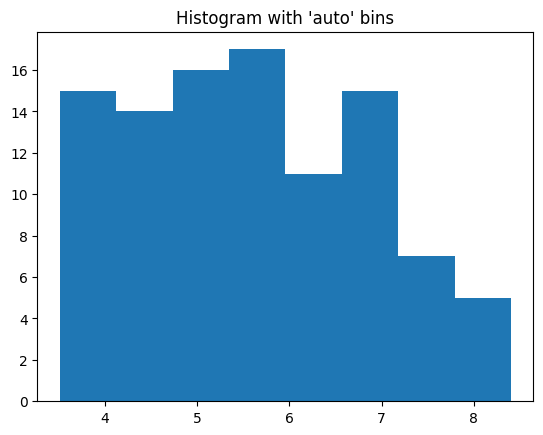

In [4]:
print(expected_value, variance_value)
plt.hist(function_eval, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

## Choosing degree and norm for polynomial approach

In [13]:

RMSE_1 = []
RMSE_2 = []
RMSE_3 = []


#indexes = list(range(min_degree, max_deg))
new_sample = utils.draw_sample(1000)

def get_newton_poly_6d(f, deg, lp):
    mi_6d = mp.MultiIndexSet.from_degree(
    spatial_dimension=6,
    poly_degree=deg,
    lp_degree=lp,
    )
    grd = mp.Grid(mi_6d)
    lag_coeffs_2d = f(grd.unisolvent_nodes)
    lag_poly = mp.LagrangePolynomial(mi_6d, lag_coeffs_2d)
    return mp.LagrangeToNewton(lag_poly)()


def get_RMSE(f, interpolant, new_sample):
    sample_size = new_sample.shape[0]
    return np.sqrt(np.sum((f(new_sample) - interpolant(new_sample))**2) / sample_size)
#for L1
min_degree = 1
max_deg = 9
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, 1)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_1.append(RMSE)

# for L2
min_degree = 1
max_deg = 6
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, 2)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_2.append(RMSE)


# for L_inf
min_degree = 1
max_deg = 3
for deg in range(min_degree, max_deg):
    poly = get_newton_poly_6d(otl_normalized, deg, np.inf)
    RMSE  = get_RMSE(otl_normalized, poly, new_sample)
    RMSE_3.append(RMSE)

print(RMSE_1)
print(RMSE_2)
print(RMSE_3)

[0.3761824014040605, 0.11032752217985829, 0.0359677809954648, 0.00980240202752928, 0.002251053518662074, 0.0006555924861752949, 0.00017917540275246309, 7.1164467580625e-05]
[0.3761824014040605, 0.110518229060652, 0.022152928677783124, 0.008555625779226026, 0.001721837092820786]
[0.2870441139580008, 0.049552014414550004]


[[ 0.05107342 -0.91120274  0.40565563 -0.03945724 -0.60213789 -0.81655904]
 [-0.6468097   0.52176634 -0.21070015  0.7014435  -0.1930416  -0.97446789]
 [-0.81728175  0.45278224  0.5653362  -0.83060172  0.38533158  0.59961098]
 ...
 [ 0.19725242  0.99226831 -0.49231252 -0.27135572  0.84504838 -0.83539165]
 [ 0.48765224 -0.96195629 -0.38754884 -0.05470273  0.77433578 -0.84293807]
 [-0.2212131  -0.42658722 -0.28234063  0.40180509 -0.16092478 -0.29673358]]


C:\Users\macie\AppData\Local\Temp\ipykernel_21888\3873638672.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


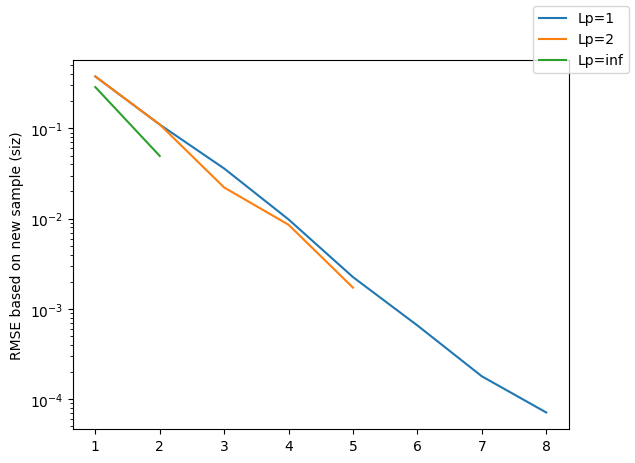

In [17]:
fig, ax = plt.subplots()
ax.plot(list(range(min_degree, 9)), RMSE_1, label = "Lp=1")
ax.plot(list(range(min_degree, 6)), RMSE_2, label = "Lp=2")
ax.plot(list(range(min_degree, 3)), RMSE_3, label = "Lp=inf")
ax.set_yscale('log')
ax.set_ylabel('RMSE based on new sample (siz) truncated to multisetIndexSize 5000')
fig.legend()
fig.show()